In [106]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
geo_df = gpd.read_file('district-39.geojson')

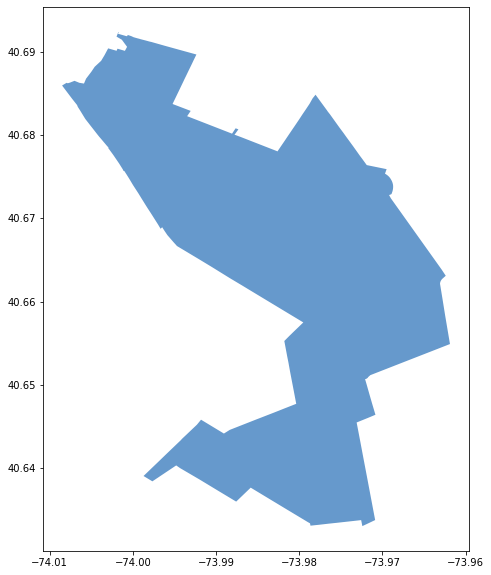

In [4]:
ax = geo_df.plot(color='#6699cc')

In [5]:
def list_coordinates(geometry):
    coordinates = list(geometry.exterior.coords)
    return (coordinates)

coordinates = geo_df.geometry.apply(list_coordinates)[0]

In [6]:
coordinates[0:10]

[(-73.9780443335201, 40.6848648670859),
 (-73.9774586590442, 40.6840605389783),
 (-73.9766680312539, 40.6829804668082),
 (-73.976570160538, 40.6828353110453),
 (-73.9763177217962, 40.6825168636468),
 (-73.9758354945955, 40.6818438810937),
 (-73.9751446042666, 40.6808801565149),
 (-73.9746926197494, 40.680274868138),
 (-73.9743119177113, 40.6797430740631),
 (-73.9735102689416, 40.6786473721218)]

In [7]:
d39 = pd.read_csv('D39.csv')

In [8]:
d39 = d39.dropna(subset=['Store'])
d39 = d39.dropna(subset=['Address'])

In [9]:
d39['Address'] = d39['Address'].astype(str) + ', Brooklyn, NY'

In [10]:
d39.head()

,Store,Address,Phone
0,Baciccia,"426 7th Ave, Brooklyn, NY",(718) 788-1000
1,Mike Daddy's Pizza,"449 7th Ave, Brooklyn, NY",718-768-9700
2,Pizzas Plus,"359 7th Ave, Brooklyn, NY",(718) 768-5327
3,Sotto Voce,"225 7th Ave, Brooklyn, NY",(718) 369-9322
4,Numero 28,"139 7th Ave, Brooklyn, NY",(718) 398-9198


In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="your app name or e-mail address here")

def get_lat_lon(address_column):
    
    lat = []
    lon = []
    
    for a in address_column:
        location = geolocator.geocode(a)
        
        if location is not None:
            lat.append(location.latitude)
            lon.append(location.longitude)
        else:
            lat.append('NA')
            lon.append('NA')
    return lat, lon

In [12]:
d39['lat'], d39['lon'] = get_lat_lon(d39.Address)

In [13]:
d39_clean = d39[d39.lat != 'NA']

In [14]:
d39_clean

,Store,Address,Phone,lat,lon
0,Baciccia,"426 7th Ave, Brooklyn, NY",(718) 788-1000,40.6638,-73.9844
1,Mike Daddy's Pizza,"449 7th Ave, Brooklyn, NY",718-768-9700,40.6629,-73.9847
2,Pizzas Plus,"359 7th Ave, Brooklyn, NY",(718) 768-5327,40.6659,-73.9822
3,Sotto Voce,"225 7th Ave, Brooklyn, NY",(718) 369-9322,40.6699,-73.9789
4,Numero 28,"139 7th Ave, Brooklyn, NY",(718) 398-9198,40.6727,-73.9764
...,...,...,...,...,...
692,Interference Archive,"314 7th St., Brooklyn, NY",NaN,40.6705,-73.9858
693,Van Brunt Post Office,"275 9th St., Brooklyn, NY",(718) 768-1284,40.6697,-73.9873
694,District Office of Council Member Brad Lander,"456 5th Ave., Brooklyn, NY",(718) 499-1090,40.6689,-73.9869
698,Arecibo Car and Limo Service,"171 5th Ave., Brooklyn, NY",(718) 783-6465,40.6773,-73.9797


In [15]:
in_district = []
coords = coordinates
poly = Polygon(coords)

for i in list(zip(d39_clean.lat,d39_clean.lon)):
    point = Point(i)
    if point.within(poly):
        in_district.append('Yes')
    else:
        in_district.append('Yes')

In [16]:
d39_clean['In District'] = in_district

In [17]:
d39 = d39[d39.lat != 'NA']

In [116]:
m = folium.Map(location=[40.6638, -73.984], tiles="openstreetmap", zoom_start=13)
folium.GeoJson(data=geo_df["geometry"]).add_to(m)

In [117]:
for i in range(0,len(d39_clean)):
    popup = str(d39_clean.iloc[i]['Store']) + ' ' + str(d39_clean.iloc[i]['Address'])
    lat = d39_clean.iloc[i]['lat']
    lon = d39_clean.iloc[i]['lon']
    folium.Marker((lat,lon), popup=popup, icon=folium.Icon(color='red', icon_size=(25, 25))).add_to(m)

In [118]:
m

In [124]:
d39_clean.to_csv(r'/Users/avonleafisher/Desktop/Small Businesses\D39_Small_Businesses.csv', index=False)